# <center><a href='https://notebook.basthon.fr/?from=https://raw.githubusercontent.com/fortierq/itc1/master/files/5_graph/tp/tp4/tp_labyrinth.ipynb'>TP Graphe 4 : labyrinthe <img src=https://framagit.org/uploads/-/system/project/avatar/55763/basthon_shadow.png width=100></a></center>

In [68]:
import networkx as nx
import random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 12)

def generate_labyrinth(n, p):
    G = nx.Graph()
    G.add_nodes_from((i, j) for i in range(n) for j in range(p))
    visited = [[False]*p for _ in range(n)]
    def dfs(i, j):
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < p and not visited[x][y]:
                G.add_edge((i, j), (x, y))
                dfs(x, y)
    dfs(0, 0)
    return G

In [69]:
n = 10
G = generate_labyrinth(n, n)

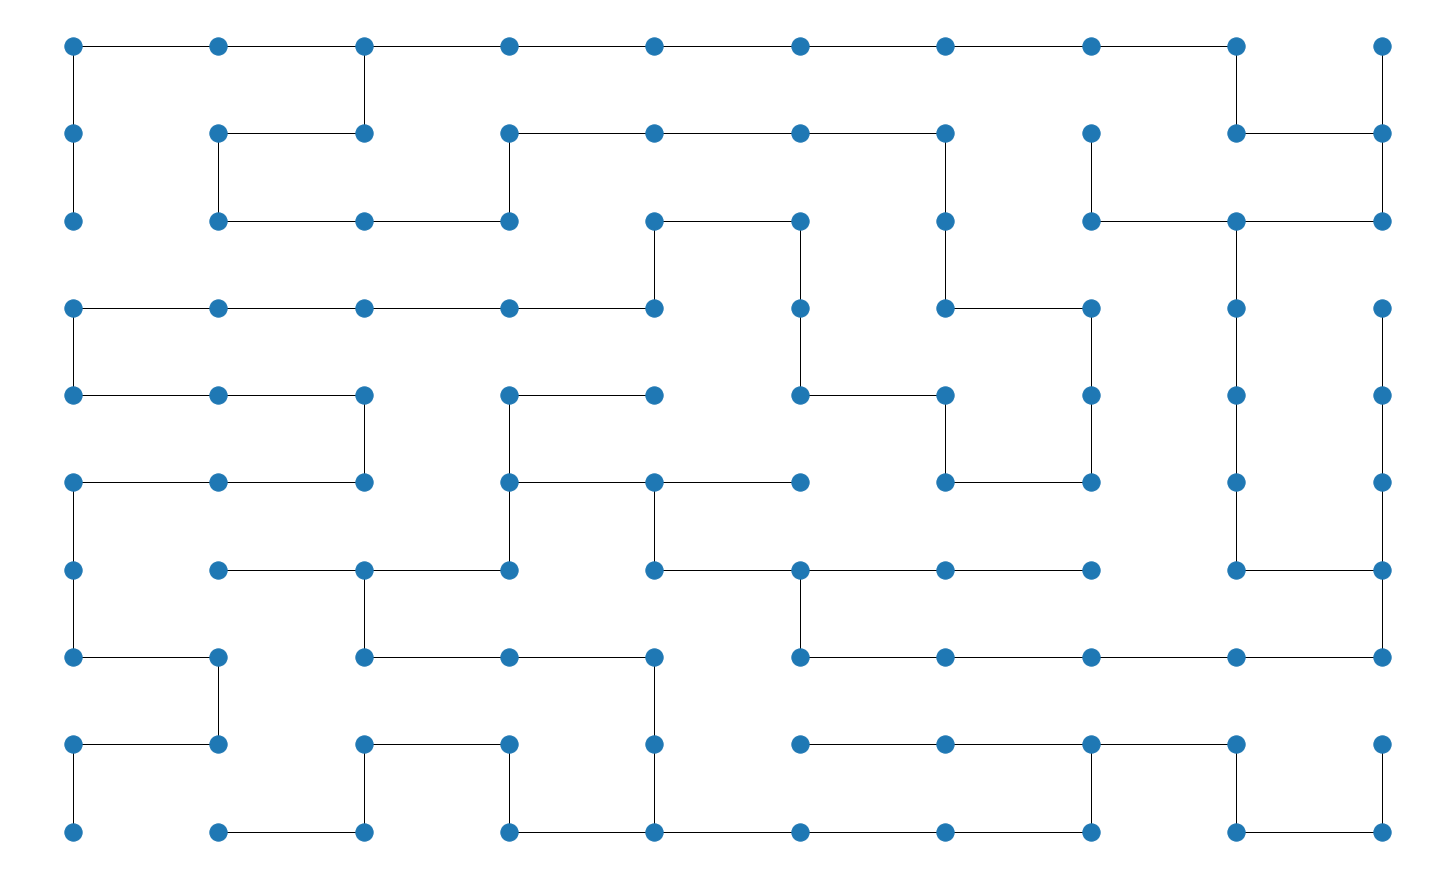

In [70]:
nx.draw(G, pos={p: p for p in G.nodes()})

In [71]:
def solve_labyrinth(G, n):
    visited = [[False]*n for _ in range(n)]
    path = []
    for i,e in enumerate(G.edges):
        G.edges[e]['index'] = i
    def dfs(i, j):
        if i == n - 1 == j:
            return True
        visited[i][j] = True
        neighbors = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
        random.shuffle(neighbors)
        for x, y in neighbors:
            if 0 <= x < n and 0 <= y < n and (x, y) in G[(i, j)] and not visited[x][y]:
                if dfs(x, y):
                    path.append(G[(i, j)][(x, y)]['index'])
                    return True
        return False
    dfs(0, 0)
    return path

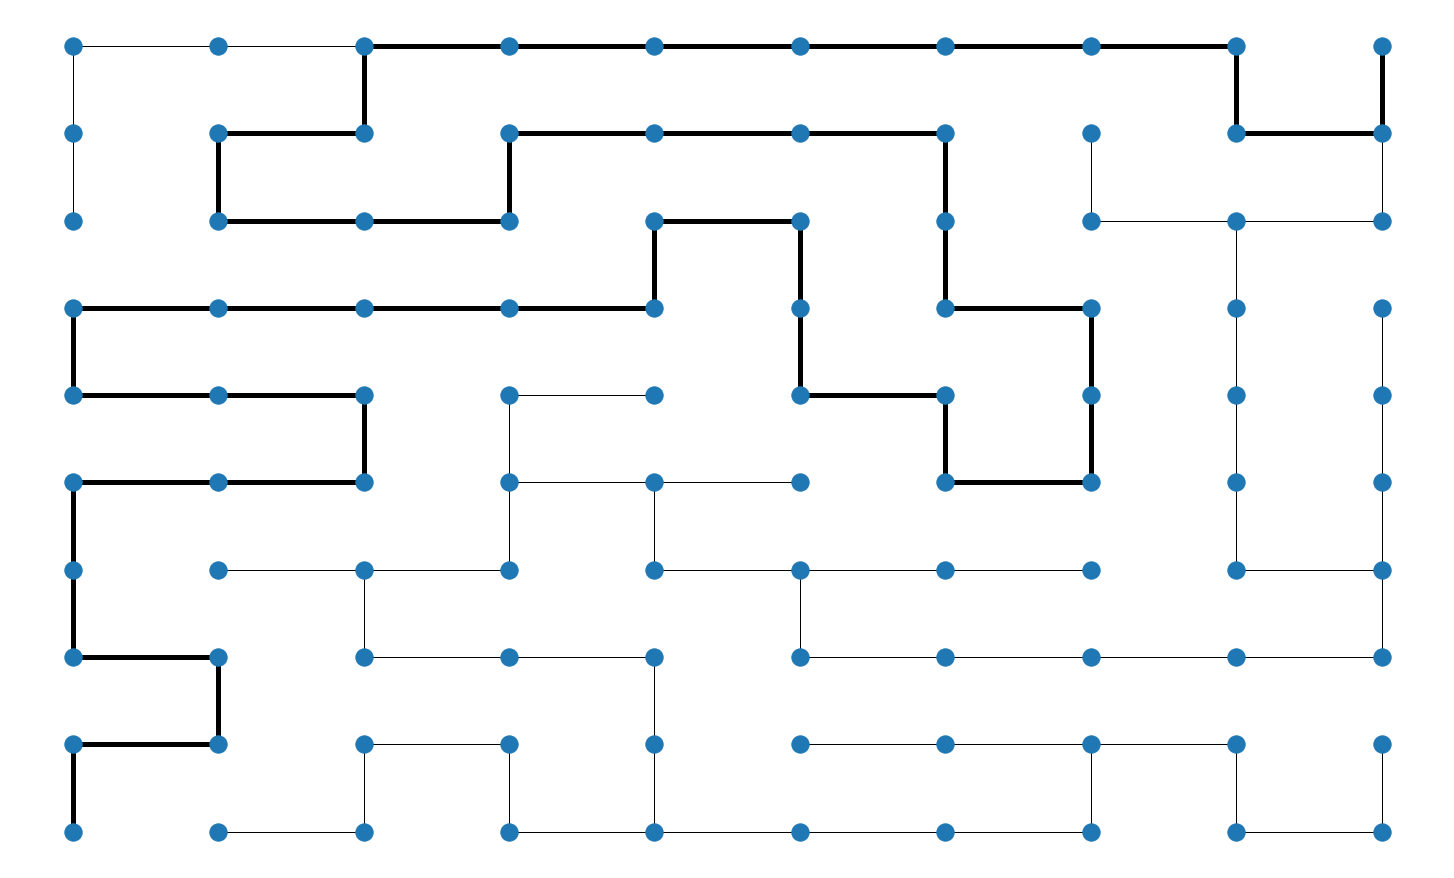

In [74]:
path = solve_labyrinth(G, n)
widths = [5 if i in path else 1 for i in range(len(G.edges))]
nx.draw(G, pos={p: p for p in G.nodes()}, width=widths)